# Colabs

Machine Learning Crash Course uses Colaboratories (Colabs) for all programming exercises. Colab is Google's implementation of [Jupyter Notebook](https://jupyter.org/). For more information about Colabs and how to use them, go to [Welcome to Colaboratory](https://research.google.com/colaboratory).

# Binary Classification

So far, you've only created regression models. That is, you created models that produced floating-point predictions, such as, "houses in this neighborhood costs N thousand dollars." In this Colab, you'll create and evaluate a binary [classification model](https://developers.google.com/machine-learning/glossary/#classification_model).  That is, you'll create a model that answers a binary question. In this exercise, the binary question will be, "Are houses in this neighborhood above a certain price?"



# Clasificación Binaria

Hasta ahora, solo has creado modelos de regresión. Es decir, has creado modelos que generan predicciones de punto flotante, como "las casas en este vecindario cuestan N mil dólares". En este Colab, crearás y evaluarás un [modelo de clasificación binaria](https://developers.google.com/machine-learning/glossary/#classification_model). Es decir, crearás un modelo que responde a una pregunta binaria. En este ejercicio, la pregunta binaria será: "¿Las casas en este vecindario están por encima de cierto precio?"

## Learning Objectives:

After doing this Colab, you'll know how to:

  * Convert a regression question into a classification question.
  * Modify the classification threshold and determine how that modification influences the model.
  * Experiment with different classification metrics to determine your model's effectiveness.

## Objetivos de Aprendizaje:

Después de realizar este Colab, sabrás cómo:

  * Convertir una pregunta de regresión en una pregunta de clasificación.
  * Modificar el umbral de clasificación y determinar cómo esa modificación influye en el modelo.
  * Experimentar con diferentes métricas de clasificación para determinar la efectividad de tu modelo.

## The Dataset
  
Like several of the previous Colabs, this Colab uses the [California Housing Dataset](https://developers.google.com/machine-learning/crash-course/california-housing-data-description).

## El Conjunto de Datos

Al igual que en varios de los Colabs anteriores, este Colab utiliza el [Conjunto de Datos de Viviendas de California](https://developers.google.com/machine-learning/crash-course/california-housing-data-description).

## Call the import statements

The following code imports the necessary modules.

In [15]:
#@title Load the imports

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from matplotlib import pyplot as plt

# The following lines adjust the granularity of reporting.
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format
# tf.keras.backend.set_floatx('float32')

print("Ran the import statements.")

Ran the import statements.


## Load the datasets from the internet

The following code cell loads the separate .csv files and creates the following two pandas DataFrames:

* `train_df`, which contains the training set
* `test_df`, which contains the test set

## Cargar los conjuntos de datos desde internet

La siguiente celda de código carga los archivos .csv por separado y crea los siguientes dos DataFrames de pandas:

* `train_df`, que contiene el conjunto de entrenamiento
* `test_df`, que contiene el conjunto de prueba

In [16]:
train_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")
test_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_test.csv")
train_df = train_df.reindex(np.random.permutation(train_df.index)) # shuffle the training set

Unlike some of the previous Colabs, the preceding code cell did not scale the label (`median_house_value`).  The following section ("Normalize values") provides an alternative approach.

## Normalize values

When creating a model with multiple features, the values of each feature should cover roughly the same range.  For example, if one feature's range spans 500 to 100,000 and another feature's range spans 2 to 12, then the model will be difficult or impossible to train. Therefore, you should
[normalize](https://developers.google.com/machine-learning/glossary/#normalization) features in a multi-feature model.

The following code cell normalizes datasets by converting each raw value (including the label) to its Z-score. A **Z-score** is the number of standard deviations from the mean for a particular raw value. For example, consider a feature having the following characteristics:

  * The mean is 60.
  * The standard deviation is 10.

The raw value 75 would have a Z-score of +1.5:

```
  Z-score = (75 - 60) / 10 = +1.5
```

The raw value 38 would have a Z-score of -2.2:

```
  Z-score = (38 - 60) / 10 = -2.2
```


## Normalizar valores

Cuando se crea un modelo con múltiples características, los valores de cada característica deben abarcar aproximadamente el mismo rango. Por ejemplo, si el rango de una característica va desde 500 hasta 100,000 y el rango de otra característica va desde 2 hasta 12, entonces será difícil o incluso imposible entrenar el modelo. Por lo tanto, se debe realizar una [normalización](https://developers.google.com/machine-learning/glossary/#normalization) de las características en un modelo multi-característica.

La siguiente celda de código normaliza los conjuntos de datos convirtiendo cada valor crudo (incluyendo la etiqueta) a su puntuación Z. Una **puntuación Z** es el número de desviaciones estándar respecto a la media para un valor crudo específico. Por ejemplo, considera una característica con las siguientes características:

  * La media es 60.
  * La desviación estándar es 10.

El valor crudo 75 tendría una puntuación Z de +1.5:

```
  Puntuación Z = (75 - 60) / 10 = +1.5
```

El valor crudo 38 tendría una puntuación Z de -2.2:

```
  Puntuación Z = (38 - 60) / 10 = -2.2
```

In [17]:
# Calculate the Z-scores of each column in the training set and
# write those Z-scores into a new pandas DataFrame named train_df_norm.
# Calcular las puntuaciones Z de cada columna en el conjunto de entrenamiento y
# escribir esas puntuaciones Z en un nuevo DataFrame de pandas llamado train_df_norm.
train_df_mean = train_df.mean()
train_df_std = train_df.std()
train_df_norm = (train_df - train_df_mean)/train_df_std

# Examine some of the values of the normalized training set. Notice that most
# Z-scores fall between -2 and +2.
# Examinar algunos de los valores del conjunto de entrenamiento normalizado. Observa que la mayoría
# de las puntuaciones Z caen entre -2 y +2.
train_df_norm.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
7542,0.6,-0.8,1.0,-0.3,-0.2,-0.2,-0.2,-0.0,0.1
8715,0.5,-0.7,0.5,-0.3,-0.5,-0.4,-0.4,0.5,0.2
8222,0.6,-0.7,-0.6,-0.9,-0.7,-0.4,-0.7,-1.0,1.2
12345,-1.0,1.3,-0.4,1.9,2.2,1.3,2.3,-0.4,-0.4
7477,0.6,-0.7,0.6,1.9,1.5,0.7,1.6,2.2,2.5


In [18]:
# Calcular las puntuaciones Z de cada columna en el conjunto de prueba y
# escribir esas puntuaciones Z en un nuevo DataFrame de pandas llamado test_df_norm.
test_df_norm = (test_df - train_df_mean) / train_df_std

# Ten en cuenta que transformamos los datos de prueba con los valores calculados a partir del conjunto de entrenamiento,
# ya que siempre debes transformar tus conjuntos de datos con exactamente los mismos valores.


## Task 1: Create a binary label

In classification problems, the label for every example must be either 0 or 1. Unfortunately, the natural label in the California Housing Dataset, `median_house_value`, contains floating-point values like 80,100 or 85,700 rather than 0s and 1s, while the normalized version of `median_house_values` contains floating-point values primarily between -3 and +3.

Your task is to create a new column named `median_house_value_is_high` in both the training set and the test set . If the `median_house_value` is higher than a certain arbitrary value (defined by `threshold`), then set `median_house_value_is_high` to 1. Otherwise, set `median_house_value_is_high` to 0.

**Hint:** The cells in the `median_house_value_is_high` column must each hold `1` and `0`, not `True` and `False`. To convert `True` and `False` to  `1` and `0`, call the pandas DataFrame function `astype(float)`.


## Tarea 1: Crear una etiqueta binaria

En problemas de clasificación, la etiqueta para cada ejemplo debe ser 0 o 1. Desafortunadamente, la etiqueta natural en el conjunto de datos de viviendas de California, `median_house_value`, contiene valores de punto flotante como 80,100 o 85,700 en lugar de 0s y 1s, mientras que la versión normalizada de `median_house_values` contiene valores de punto flotante principalmente entre -3 y +3.

Tu tarea es crear una nueva columna llamada `median_house_value_is_high` tanto en el conjunto de entrenamiento como en el conjunto de prueba. Si el valor de `median_house_value` es mayor que un valor arbitrario específico (definido por `threshold`), establece `median_house_value_is_high` en 1. De lo contrario, establece `median_house_value_is_high` en 0.

**Pista:** Las celdas en la columna `median_house_value_is_high` deben contener cada una `1` y `0`, no `True` y `False`. Para convertir `True` y `False` a `1` y `0`, utiliza la función `astype(float)` del DataFrame de pandas.

In [19]:
# Establecimos arbitrariamente el umbral en 265,000, que es
# el percentil 75 para los valores medios de las casas. Cada vecindario
# con un precio medio de casa superior a 265,000 será etiquetado como 1,
# y todos los demás vecindarios serán etiquetados como 0.

threshold = 265000 # This is the 75th percentile for median house values.
train_df_norm["median_house_value_is_high"] = (train_df["median_house_value"] > threshold).astype(float) #neuva celda
test_df_norm["median_house_value_is_high"] = (train_df["median_house_value"] > threshold).astype(float) #nueva celda

# Print out a few example cells from the beginning and
# middle of the training set, just to make sure that
# your code created only 0s and 1s in the newly created
# median_house_value_is_high column
train_df_norm["median_house_value_is_high"].head(8000)

# Alternativamente, en lugar de elegir el umbral
# basado en los valores de vivienda en bruto, puedes trabajar con puntuaciones Z.
# Por ejemplo, la siguiente solución posible utiliza una puntuación Z
# de +1.0 como el umbral, lo que significa que no más
# del 16% de los valores en median_house_value_is_high
# serán etiquetados como 1.

# threshold_in_Z = 1.0
# train_df_norm["median_house_value_is_high"] = (train_df_norm["median_house_value"] > threshold_in_Z).astype(float)
# test_df_norm["median_house_value_is_high"] = (test_df_norm["median_house_value"] > threshold_in_Z).astype(float)

7542    0.0
8715    0.0
8222    1.0
12345   0.0
7477    1.0
         ..
1165    0.0
15065   0.0
15918   1.0
4639    0.0
13918   0.0
Name: median_house_value_is_high, Length: 8000, dtype: float64

## Represent features as input layers

This code cell specifies the features, `median_income` and ` total_rooms`, that you'll ultimately train the model on. These [Input](https://www.tensorflow.org/api_docs/python/tf/keras/Input) objects are instantiated as Keras tensors.

## Representar características como capas de entrada

Esta celda de código especifica las características, `median_income` y `total_rooms`, en las que finalmente entrenarás el modelo. Estos objetos [Input](https://www.tensorflow.org/api_docs/python/tf/keras/Input) se instancian como tensores de Keras.

In [20]:
inputs = {
# Features used to train the model on.
  'median_income': tf.keras.Input(shape=(1,)),
  'total_rooms': tf.keras.Input(shape=(1,))
}


## Define functions that build and train a model

The following code cell defines two functions:

  * `create_model(inputs, learning_rate, METRICS)`, which defines the model's
    topography.
  * `train_model(model, dataset, epochs, label_name, batch_size, shuffle)`, uses input features and labels to train the model.

Prior exercises used [ReLU](https://developers.google.com/machine-learning/glossary#ReLU) as the [activation function](https://developers.google.com/machine-learning/glossary#activation-function). By contrast, this exercise uses [sigmoid](https://developers.google.com/machine-learning/glossary#sigmoid-function) as the activation function.

## Definir funciones que construyan y entrenen un modelo

La siguiente celda de código define dos funciones:

  * `create_model(inputs, learning_rate, METRICS)`, que define la topografía del modelo.
  * `train_model(model, dataset, epochs, label_name, batch_size, shuffle)`, utiliza características de entrada y etiquetas para entrenar el modelo.

En ejercicios anteriores se utilizó [ReLU](https://developers.google.com/machine-learning/glossary#ReLU) como la [función de activación](https://developers.google.com/machine-learning/glossary#activation-function). En cambio, en este ejercicio se utiliza [sigmoid](https://developers.google.com/machine-learning/glossary#sigmoid-function) como la función de activación.

In [21]:
#@title Define las funciones que crean y entrenan un modelo.
def create_model(my_inputs, my_learning_rate, METRICS):
  # Utiliza una capa Concatenate para concatenar las capas de entrada en un solo tensor.
  # como entrada para la capa Dense. Ejemplo: [input_1[0][0], input_2[0][0]]
  concatenated_inputs = tf.keras.layers.Concatenate()(my_inputs.values())
  dense = layers.Dense(units=1, name='dense_layer', activation=tf.sigmoid)
  dense_output = dense(concatenated_inputs)
  """Crea y compila un modelo de clasificación simple."""
  my_outputs = {
    'dense': dense_output,
  }
  model = tf.keras.Model(inputs=my_inputs, outputs=my_outputs)

  # Llama al método compile para construir las capas en un modelo que
  # TensorFlow pueda ejecutar. Observa que estamos utilizando una función de pérdida
  # diferente para clasificación que para regresión.
  model.compile(optimizer=tf.keras.optimizers.experimental.RMSprop(learning_rate=my_learning_rate),
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=METRICS)
  return model


def train_model(model, dataset, epochs, label_name,
                batch_size=None, shuffle=True):
  """Alimenta un conjunto de datos en el modelo para entrenarlo."""

  # El parámetro x de tf.keras.Model.fit puede ser una lista de matrices, donde
  # cada matriz contiene los datos para una característica. Aquí, estamos pasando
  # cada columna en el conjunto de datos. Ten en cuenta que la capa de características filtrará
  # la mayoría de esas columnas, dejando solo las columnas deseadas y sus
  # representaciones como características.
  features = {name:np.array(value) for name, value in dataset.items()}
  label = np.array(features.pop(label_name))
  history = model.fit(x=features, y=label, batch_size=batch_size,
                      epochs=epochs, shuffle=shuffle)

  # La lista de épocas se almacena por separado del resto del historial.
  epochs = history.epoch

  # Aísla la métrica de clasificación para cada época.
  hist = pd.DataFrame(history.history)

  return epochs, hist

print("Definidas las funciones create_model y train_model.")


Definidas las funciones create_model y train_model.


## Define a plotting function

The following [matplotlib](https://developers.google.com/machine-learning/glossary/#matplotlib) function plots one or more curves, showing how various classification metrics change with each epoch.

## Define una función de trazado

La siguiente función de [matplotlib](https://developers.google.com/machine-learning/glossary/#matplotlib) traza una o más curvas, mostrando cómo varias métricas de clasificación cambian con cada época.

In [22]:
#@title Define the plotting function.
def plot_curve(epochs, hist, list_of_metrics):
  """Plot a curve of one or more classification metrics vs. epoch."""
  # list_of_metrics should be one of the names shown in:
  # https://www.tensorflow.org/tutorials/structured_data/imbalanced_data#define_the_model_and_metrics

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Value")

  for m in list_of_metrics:
    x = hist[m]
    plt.plot(epochs[1:], x[1:], label=m)

  plt.legend()

print("Defined the plot_curve function.")

Defined the plot_curve function.


## Invoke the creating, training, and plotting functions

The following code cell calls specify the hyperparameters, and then invokes the
functions to create and train the model, and then to plot the results.

## Invoca las funciones de creación, entrenamiento y trazado

La siguiente celda de código especifica los hiperparámetros y luego invoca las
funciones para crear y entrenar el modelo, y luego para trazar los resultados.

Epoch 1/20


c:\Users\PERSONAL\OneDrive\Documentos\PROGRAMACION GITHUB\MACHINE LEARNING\env\lib\site-packages\keras\src\engine\functional.py:642: UserWarning: Input dict contained keys ['longitude', 'latitude', 'housing_median_age', 'total_bedrooms', 'population', 'households', 'median_house_value'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


170/170 [==============================] - 0s 842us/step - loss: 0.7334 - accuracy: 0.5020
Epoch 2/20
170/170 [==============================] - 0s 836us/step - loss: 0.6563 - accuracy: 0.5848
Epoch 3/20
170/170 [==============================] - 0s 941us/step - loss: 0.5903 - accuracy: 0.6489
Epoch 4/20
170/170 [==============================] - 0s 817us/step - loss: 0.5360 - accuracy: 0.6985
Epoch 5/20
170/170 [==============================] - 0s 804us/step - loss: 0.4920 - accuracy: 0.7372
Epoch 6/20
170/170 [==============================] - 0s 860us/step - loss: 0.4582 - accuracy: 0.7634
Epoch 7/20
170/170 [==============================] - 0s 841us/step - loss: 0.4340 - accuracy: 0.7823
Epoch 8/20
170/170 [==============================] - 0s 786us/step - loss: 0.4174 - accuracy: 0.7951
Epoch 9/20
170/170 [==============================] - 0s 765us/step - loss: 0.4076 - accuracy: 0.8031
Epoch 10/20
170/170 [==============================] - 0s 803us/step - loss: 0.4022 - accurac

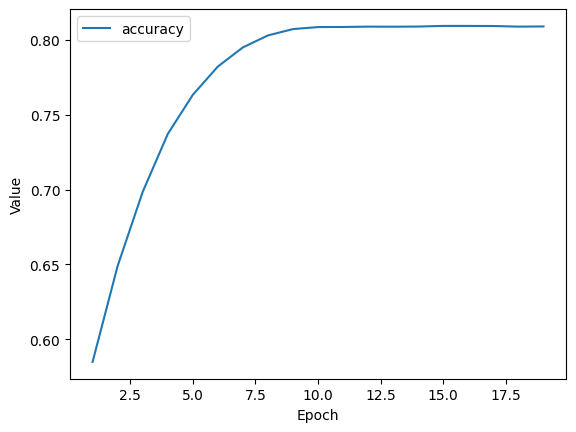

In [23]:
# The following variables are the hyperparameters.
learning_rate = 0.001
#learning_rate: Es la tasa de aprendizaje, que determina qué tan grande son los pasos que el algoritmo toma durante el entrenamiento para ajustar los pesos del modelo. 
# Un valor pequeño significa pasos pequeños y, a menudo, una convergencia más lenta pero más precisa. 
# Un valor grande puede llevar a convergencia más rápida, pero existe el riesgo de superar el mínimo óptimo.

epochs = 20
#epochs: Representa el número de veces que el modelo verá todo el conjunto de entrenamiento durante el proceso de entrenamiento. 
# Cada época consiste en un pase hacia adelante y hacia atrás a través de todos los ejemplos de entrenamiento.

batch_size = 100
#batch_size: Es el número de ejemplos de entrenamiento utilizados en una iteración. 
# Durante cada época, los datos se dividen en lotes, y el modelo se actualiza después de cada lote. 
# El tamaño del lote afecta la velocidad y la estabilidad del entrenamiento.



label_name = "median_house_value_is_high"
classification_threshold = 0.35

# Establish the metrics the model will measure.
METRICS = [
           tf.keras.metrics.BinaryAccuracy(name='accuracy',
                                           threshold=classification_threshold),
          ]

# Establish the model's topography.
my_model = create_model(inputs, learning_rate, METRICS)

# To view a PNG of this model's layers, uncomment the call to
# `tf.keras.utils.plot_model` below. After running this code cell, click
# the file folder on the left, then the `my_classification_model.png` file.
# tf.keras.utils.plot_model(my_model, "my_classification_model.png")

# Train the model on the training set.
epochs, hist = train_model(my_model, train_df_norm, epochs,
                           label_name, batch_size)

# Plot a graph of the metric(s) vs. epochs.
list_of_metrics_to_plot = ['accuracy']

plot_curve(epochs, hist, list_of_metrics_to_plot)

Accuracy should gradually improve during training (until it can
improve no more).

## Evaluate the model against the test set

At the end of model training, you ended up with a certain accuracy against the *training set*. Invoke the following code cell to determine your model's accuracy against the *test set*.

## Evaluar el modelo contra el conjunto de prueba

Al final del entrenamiento del modelo, obtuviste una cierta exactitud contra el *conjunto de entrenamiento*. Invoca la siguiente celda de código para determinar la exactitud de tu modelo contra el *conjunto de prueba*.

In [24]:
features = {name:np.array(value) for name, value in test_df_norm.items()}
label = np.array(features.pop(label_name))

my_model.evaluate(x = features, y = label, batch_size=batch_size)

30/30 [==============================] - 0s 886us/step - loss: 0.6516 - accuracy: 0.6913


[0.6515632271766663, 0.6913333535194397]

## Task 2: How accurate is your model really?

Is your model valuable?

In [25]:
#@title Double-click for a possible answer to Task 2.

# A perfect model would make 100% accurate predictions.
# Our model makes 80% accurate predictions. 80% sounds
# good, but note that a model that always guesses
# "median_house_value_is_high is False" would be 75%
# accurate.
# Un modelo perfecto haría predicciones con un 100% de precisión.
# Nuestro modelo hace predicciones con un 80% de precisión. Un 80%
# suena bien, pero ten en cuenta que un modelo que siempre
# adivine "median_house_value_is_high es Falso" tendría un 75%
# de precisión.


## Task 3: Add precision and recall as metrics

Relying solely on accuracy, particularly for a class-imbalanced data set (like ours), can be a poor way to judge a classification model.  Modify the code in the following code cell to enable the model to measure not only accuracy but also precision and recall. We have
added accuracy and precision; your task is to add recall. See the [TensorFlow Reference](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/Recall) for details.

## Tarea 3: Agregar precisión y recall como métricas

Depender únicamente de la precisión, especialmente para un conjunto de datos desequilibrado en clases (como el nuestro), puede ser una forma deficiente de evaluar un modelo de clasificación. Modifica el código en la siguiente celda de código para permitir que el modelo mida no solo la precisión, sino también la precisión y el recall. Hemos agregado precisión y exactitud; tu tarea es agregar recall. Consulta la [Referencia de TensorFlow](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/Recall) para obtener detalles.

Epoch 1/20
170/170 [==============================] - 1s 952us/step - loss: 1.0963 - accuracy: 0.1992 - precision: 0.1289 - recall: 0.3831
Epoch 2/20
170/170 [==============================] - 0s 923us/step - loss: 0.9706 - accuracy: 0.2044 - precision: 0.1208 - recall: 0.3480
Epoch 3/20
170/170 [==============================] - 0s 926us/step - loss: 0.8632 - accuracy: 0.2213 - precision: 0.1146 - recall: 0.3146
Epoch 4/20
170/170 [==============================] - 0s 894us/step - loss: 0.7738 - accuracy: 0.2677 - precision: 0.1060 - recall: 0.2597
Epoch 5/20
170/170 [==============================] - 0s 848us/step - loss: 0.7021 - accuracy: 0.3774 - precision: 0.0945 - recall: 0.1738
Epoch 6/20
170/170 [==============================] - 0s 983us/step - loss: 0.6430 - accuracy: 0.5968 - precision: 0.1131 - recall: 0.0897
Epoch 7/20
170/170 [==============================] - 0s 938us/step - loss: 0.5939 - accuracy: 0.7118 - precision: 0.2268 - recall: 0.0638
Epoch 8/20
170/170 [=======

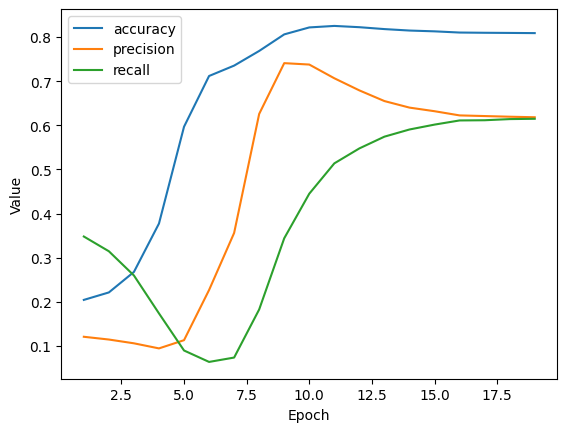

In [26]:
# The following variables are the hyperparameters.
learning_rate = 0.001
epochs = 20
batch_size = 100
classification_threshold = 0.35
label_name = "median_house_value_is_high"

# Here is the updated definition of METRICS:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy',
                                      threshold=classification_threshold),
      tf.keras.metrics.Precision(thresholds=classification_threshold,
                                 name='precision'
                                 ),
      tf.keras.metrics.Recall(thresholds=classification_threshold,
                              name="recall"),
]

# Establish the model's topography.
my_model = create_model(inputs, learning_rate, METRICS)

# Train the model on the training set.
epochs, hist = train_model(my_model, train_df_norm, epochs,
                           label_name, batch_size)

# Plot metrics vs. epochs
list_of_metrics_to_plot = ['accuracy', "precision", "recall"]
plot_curve(epochs, hist, list_of_metrics_to_plot)


# The new graphs suggest that precision and recall are
# somewhat in conflict. That is, improvements to one of
# those metrics may hurt the other metric.

## Task 4: Experiment with the classification threshold (if time permits)

Experiment with different values for `classification_threshold` in the code cell within "Invoke the creating, training, and plotting functions."  What value of `classification_threshold` produces the highest accuracy?

## Tarea 4: Experimentar con el umbral de clasificación (si el tiempo lo permite)

Experimenta con diferentes valores para `classification_threshold` en la celda de código dentro de "Invoca las funciones de creación, entrenamiento y graficación". ¿Qué valor de `classification_threshold` produce la mayor precisión?

Epoch 1/20
170/170 [==============================] - 1s 845us/step - loss: 0.5678 - accuracy: 0.7327 - precision: 0.4762 - recall: 0.6984
Epoch 2/20
170/170 [==============================] - 0s 794us/step - loss: 0.5140 - accuracy: 0.7693 - precision: 0.5306 - recall: 0.6626
Epoch 3/20
170/170 [==============================] - 0s 894us/step - loss: 0.4750 - accuracy: 0.7934 - precision: 0.5789 - recall: 0.6348
Epoch 4/20
170/170 [==============================] - 0s 823us/step - loss: 0.4474 - accuracy: 0.8076 - precision: 0.6171 - recall: 0.6063
Epoch 5/20
170/170 [==============================] - 0s 908us/step - loss: 0.4283 - accuracy: 0.8177 - precision: 0.6515 - recall: 0.5814
Epoch 6/20
170/170 [==============================] - 0s 957us/step - loss: 0.4152 - accuracy: 0.8252 - precision: 0.6870 - recall: 0.5514
Epoch 7/20
170/170 [==============================] - 0s 1ms/step - loss: 0.4066 - accuracy: 0.8308 - precision: 0.7208 - recall: 0.5270
Epoch 8/20
170/170 [=========

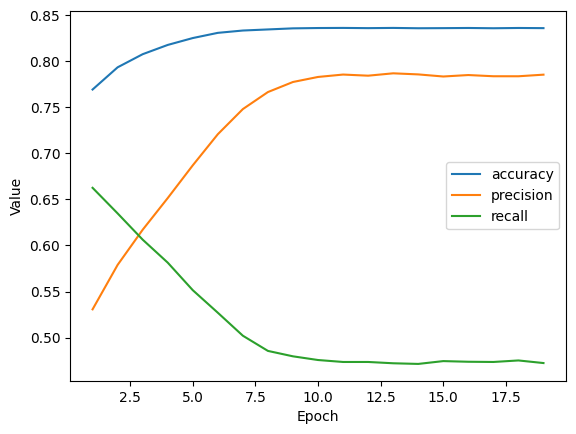

In [27]:
# The following variables are the hyperparameters.
learning_rate = 0.001
epochs = 20
batch_size = 100
classification_threshold = 0.52
label_name = "median_house_value_is_high"

# Here is the updated definition of METRICS:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy',
                                      threshold=classification_threshold),
      tf.keras.metrics.Precision(thresholds=classification_threshold,
                                 name='precision'
                                 ),
      tf.keras.metrics.Recall(thresholds=classification_threshold,
                              name="recall"),
]

# Establish the model's topography.
my_model = create_model(inputs, learning_rate, METRICS)

# Train the model on the training set.
epochs, hist = train_model(my_model, train_df_norm, epochs,
                           label_name, batch_size)

# Plot metrics vs. epochs
list_of_metrics_to_plot = ['accuracy', "precision", "recall"]
plot_curve(epochs, hist, list_of_metrics_to_plot)

# A `classification_threshold` of slightly over 0.5
# appears to produce the highest accuracy (about 83%).
# Raising the `classification_threshold` to 0.9 drops
# accuracy by about 5%.  Lowering the
# `classification_threshold` to 0.3 drops accuracy by
# about 3%.

## Task 5: Summarize model performance (if time permits)

If time permits, add one more metric that attempts to summarize the model's overall performance.


## Tarea 5: Resumir el rendimiento del modelo (si el tiempo lo permite)

Si el tiempo lo permite, agrega una métrica adicional que intente resumir el rendimiento general del modelo.

Epoch 1/20
170/170 [==============================] - 1s 1ms/step - loss: 1.0541 - auc: 0.1950
Epoch 2/20
170/170 [==============================] - 0s 825us/step - loss: 0.9499 - auc: 0.2026
Epoch 3/20
170/170 [==============================] - 0s 856us/step - loss: 0.8564 - auc: 0.2114
Epoch 4/20
170/170 [==============================] - 0s 818us/step - loss: 0.7744 - auc: 0.2241
Epoch 5/20
170/170 [==============================] - 0s 854us/step - loss: 0.7042 - auc: 0.2401
Epoch 6/20
170/170 [==============================] - 0s 898us/step - loss: 0.6446 - auc: 0.2776
Epoch 7/20
170/170 [==============================] - 0s 892us/step - loss: 0.5949 - auc: 0.3723
Epoch 8/20
170/170 [==============================] - 0s 797us/step - loss: 0.5534 - auc: 0.6286
Epoch 9/20
170/170 [==============================] - 0s 905us/step - loss: 0.5185 - auc: 0.7781
Epoch 10/20
170/170 [==============================] - 0s 1ms/step - loss: 0.4890 - auc: 0.8135
Epoch 11/20
170/170 [============

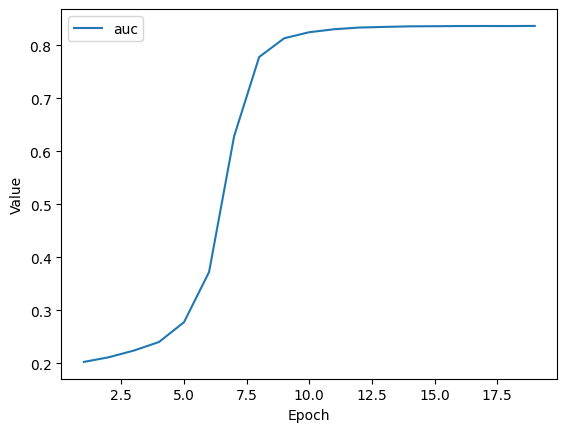

In [28]:
# Las siguientes variables son los hiperparámetros.
tasa_aprendizaje = 0.001
epocas = 20
tamaño_lote = 100
nombre_etiqueta = "median_house_value_is_high"

# El AUC es una métrica "resumen" razonable para
# modelos de clasificación.
# Aquí está la definición actualizada de METRICS para
# medir el AUC:
METRICS = [
      tf.keras.metrics.AUC(num_thresholds=100, name='auc'),
]

# Establecer la topografía del modelo.
mi_modelo = create_model(inputs, tasa_aprendizaje, METRICS)

# Entrenar el modelo en el conjunto de entrenamiento.
epocas, hist = train_model(mi_modelo, train_df_norm, epocas,
                           nombre_etiqueta, tamaño_lote)

# Graficar métricas vs. épocas.
lista_de_metricas_a_graficar = ['auc']
plot_curve(epocas, hist, lista_de_metricas_a_graficar)